In [718]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [719]:
df = pd.read_csv('./food_orders_new_delhi.csv', index_col='Order ID', parse_dates=['Order Date and Time', 'Delivery Date and Time'])
df.head()

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
Order ID,,,,,,,,,,,
1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [720]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer ID             1000 non-null   object        
 1   Restaurant ID           1000 non-null   object        
 2   Order Date and Time     1000 non-null   datetime64[ns]
 3   Delivery Date and Time  1000 non-null   datetime64[ns]
 4   Order Value             1000 non-null   int64         
 5   Delivery Fee            1000 non-null   int64         
 6   Payment Method          1000 non-null   object        
 7   Discounts and Offers    815 non-null    object        
 8   Commission Fee          1000 non-null   int64         
 9   Payment Processing Fee  1000 non-null   int64         
 10  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 93.8+ KB


##### Convert “Discounts and Offers” to a consistent numeric value or calculate the discount amounts.

In [721]:
df['Discounts and Offers'].unique()

array(['5% on App', '10%', '15% New User', nan, '50 off Promo'],
      dtype=object)

In [722]:
df['Discounts and Offers'] = df['Discounts and Offers'].fillna(0.0)

In [723]:
def extract_discount(discount_str):
    # checking type using isinstance() function
    if isinstance(discount_str, str) and '%' in discount_str:
        return ('Percentage', float(discount_str.split('%')[0]))
    # Directly checking type
    elif type(discount_str) is str and 'off' in discount_str:
        return ('Flat off', float(discount_str.split(' ')[0]))
    else:
        return ('No discount', discount_str)

In [724]:
df['Discount Percentage/Flat Off'] = df['Discounts and Offers'].apply(lambda x: extract_discount(x))
df.head()


,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage/Flat Off
Order ID,,,,,,,,,,,,
1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,"(Percentage, 5.0)"
2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,"(Percentage, 10.0)"
3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,"(Percentage, 15.0)"
4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.0,146,27,0,"(No discount, 0.0)"
5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,"(Flat off, 50.0)"


In [725]:
def calculate_discount_amount(x):
    if  x['Discount Percentage/Flat Off'][0] == 'Percentage':
        return (x['Order Value'] * x['Discount Percentage/Flat Off'][1])/100
    elif x['Discount Percentage/Flat Off'][0] == 'Flat off':
        return x['Discount Percentage/Flat Off'][1]
    else:
        return x['Discount Percentage/Flat Off'][1]

In [726]:
df['Discount Amount'] = df.apply(lambda x: calculate_discount_amount(x), axis=1)
df.head()

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage/Flat Off,Discount Amount
Order ID,,,,,,,,,,,,,
1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,"(Percentage, 5.0)",95.70
2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,"(Percentage, 10.0)",98.60
3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,"(Percentage, 15.0)",140.55
4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.0,146,27,0,"(No discount, 0.0)",0.00
5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,"(Flat off, 50.0)",50.00


In [727]:
print(df[['Order Value', 'Discount Percentage/Flat Off', 'Discount Amount']])

          Order Value Discount Percentage/Flat Off  Discount Amount
Order ID                                                           
1                1914            (Percentage, 5.0)            95.70
2                 986           (Percentage, 10.0)            98.60
3                 937           (Percentage, 15.0)           140.55
4                1463           (No discount, 0.0)             0.00
5                1992             (Flat off, 50.0)            50.00
...               ...                          ...              ...
996               825            (Percentage, 5.0)            41.25
997              1627           (No discount, 0.0)             0.00
998               553           (No discount, 0.0)             0.00
999              1414           (Percentage, 15.0)           212.10
1000             1657           (Percentage, 15.0)           248.55

[1000 rows x 3 columns]


### **Cost Analysis**
-------------

##### For the cost analysis, we’ll consider the following costs associated with each order:

- Delivery Fee: The fee charged for delivering the order.
- Payment Processing Fee: The fee for processing the payment.
- Discount Amount: The discount provided on the order.

##### We’ll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure.

In [728]:
df['Total Costs'] = df['Delivery Fee'] + df['Payment Processing Fee'] + df['Discount Amount']
df.head()

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage/Flat Off,Discount Amount,Total Costs
Order ID,,,,,,,,,,,,,,
1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,"(Percentage, 5.0)",95.70,142.70
2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,"(Percentage, 10.0)",98.60,161.60
3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,"(Percentage, 15.0)",140.55,215.55
4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.0,146,27,0,"(No discount, 0.0)",0.00,77.00
5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,"(Flat off, 50.0)",50.00,130.00


##### The revenue for the platform is mainly derived from the Commission Fee.

In [729]:
df['Revenue'] = df['Commission Fee']
df.head()

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage/Flat Off,Discount Amount,Total Costs,Revenue
Order ID,,,,,,,,,,,,,,,
1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,"(Percentage, 5.0)",95.70,142.70,150
2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,"(Percentage, 10.0)",98.60,161.60,198
3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,"(Percentage, 15.0)",140.55,215.55,195
4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.0,146,27,0,"(No discount, 0.0)",0.00,77.00,146
5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,"(Flat off, 50.0)",50.00,130.00,130


##### We’ll calculate the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.

In [730]:
df['Profit'] = df['Revenue'] - df['Total Costs']
df[['Restaurant ID', 'Order Value', 'Commission Fee', 'Payment Processing Fee', 'Delivery Fee', 'Discount Percentage/Flat Off', 'Discount Amount', 'Total Costs', 'Revenue', 'Profit']]


,Restaurant ID,Order Value,Commission Fee,Payment Processing Fee,Delivery Fee,Discount Percentage/Flat Off,Discount Amount,Total Costs,Revenue,Profit
Order ID,,,,,,,,,,
1,R2924,1914,150,47,0,"(Percentage, 5.0)",95.70,142.70,150,7.30
2,R2054,986,198,23,40,"(Percentage, 10.0)",98.60,161.60,198,36.40
3,R2870,937,195,45,30,"(Percentage, 15.0)",140.55,215.55,195,-20.55
4,R2642,1463,146,27,50,"(No discount, 0.0)",0.00,77.00,146,69.00
5,R2799,1992,130,50,30,"(Flat off, 50.0)",50.00,130.00,130,0.00
...,...,...,...,...,...,...,...,...,...,...
996,R2129,825,165,47,0,"(Percentage, 5.0)",41.25,88.25,165,76.75
997,R2742,1627,110,42,50,"(No discount, 0.0)",0.00,92.00,110,18.00
998,R2837,553,64,31,20,"(No discount, 0.0)",0.00,51.00,64,13.00


##### Overall metrics for the food delivery operations

In [731]:
# aggregate data to get overall metrics
total_orders = df.shape
total_revenue = df['Revenue'].sum()
total_costs = df['Total Costs'].sum()
total_profit = df['Profit'].sum()

print({
    "Total Orders": total_orders[0],
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
})

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 132741.84999999998, 'Total Profit': -5751.85}


##### The analysis indicates that the ***total costs*** associated with the food delivery operations exceed the ***total revenue*** generated from commission fees, resulting in a ***net loss***. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

#### To better understand the distribution of costs, revenue, and profit, let’s plot:

##### 1)  A histogram of profits per order to visualize the distribution of profitable and unprofitable orders.


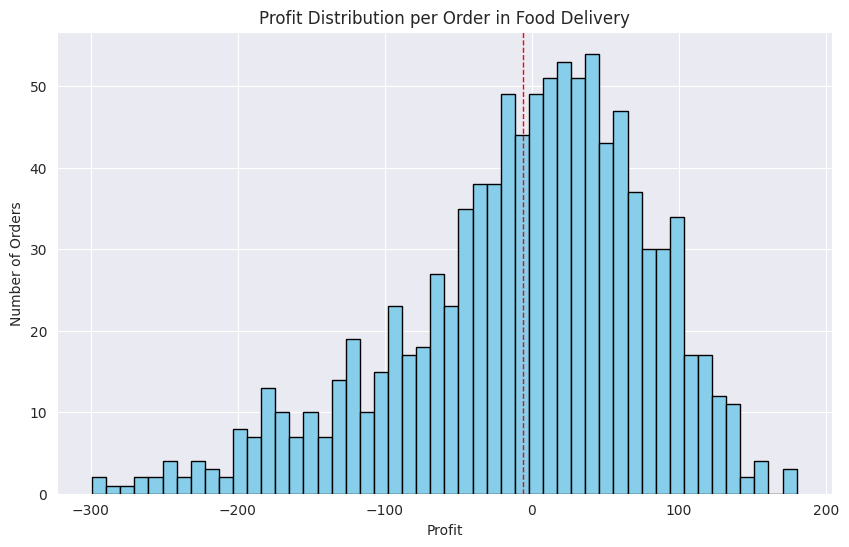

In [732]:
plt.figure(figsize=(10, 6))
plt.hist(df['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(df['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()


##### The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss (profits below 0). The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.

##### 2) A pie chart to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts).


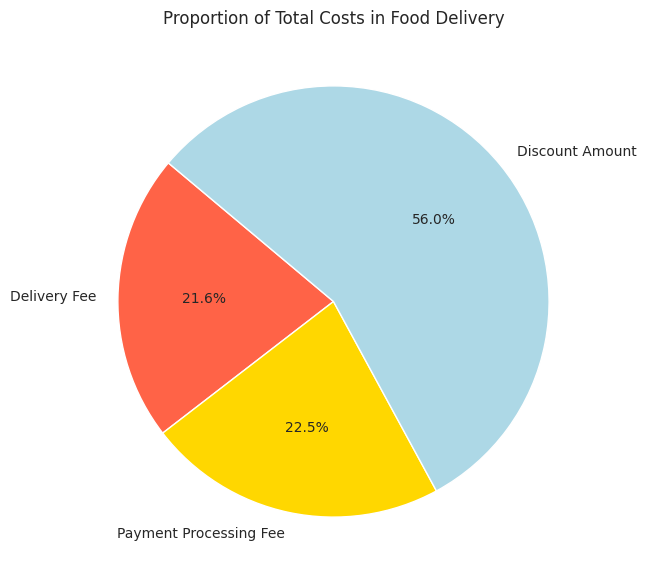

In [733]:
# pie chart for the proportion of total costs
costs_breakdown = df[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

##### The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

##### 3) A bar chart to compare total revenue, total costs, and total profit

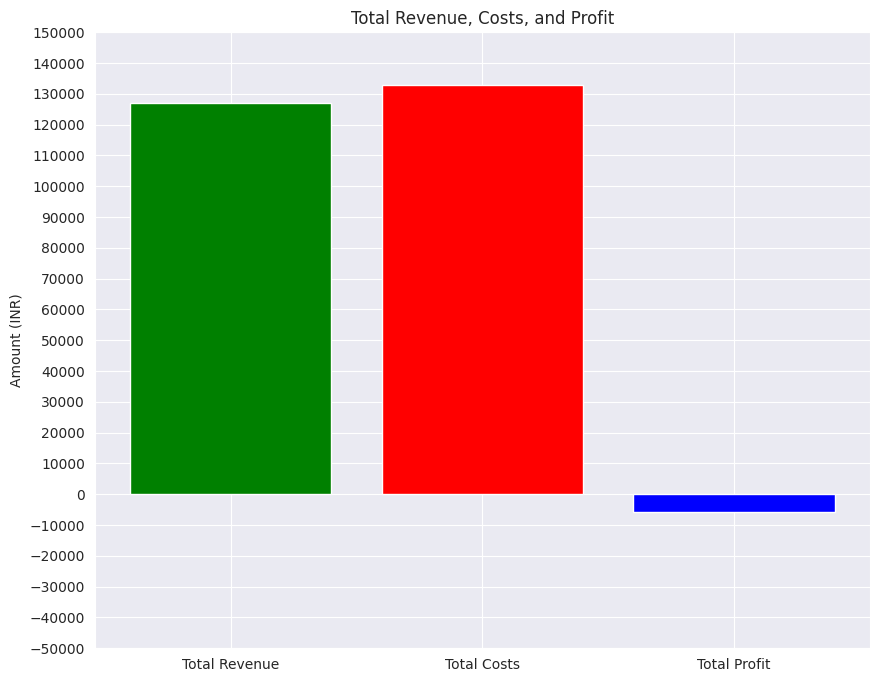

In [734]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]
plt.figure(figsize=(10, 8))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.yticks(ticks=range(-50000, 160000, 10000))
plt.ylabel('Amount (INR)')
plt.show()